In [68]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [69]:
Data_Center = pd.read_csv("root_cause_analysis.csv")

In [70]:
print(Data_Center.head())

   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003     ROOT_CAUSE  
0           1    MEMORY_LEAK  
1           1    MEMORY_LEAK  
2           1    MEMORY_LEAK  
3           1    MEMORY_LEAK  
4           0  NETWORK_DELAY  


In [71]:
# convert the target data to numeric data that can be used by machine learning algorithms
label_encoder= preprocessing.LabelEncoder()
Data_Center['ROOT_CAUSE']=label_encoder.fit_transform(Data_Center['ROOT_CAUSE'])
print(Data_Center.head())

   ID  CPU_LOAD  MEMORY_LEAK_LOAD  DELAY  ERROR_1000  ERROR_1001  ERROR_1002  \
0   1         0                 0      0           0           1           0   
1   2         0                 0      0           0           0           0   
2   3         0                 1      1           0           0           1   
3   4         0                 1      0           1           1           0   
4   5         1                 1      0           1           0           1   

   ERROR_1003  ROOT_CAUSE  
0           1           1  
1           1           1  
2           1           1  
3           1           1  
4           0           2  


In [72]:
np_Data_Center= Data_Center.to_numpy().astype(float)
np_Data_Center

array([[   1.,    0.,    0., ...,    0.,    1.,    1.],
       [   2.,    0.,    0., ...,    0.,    1.,    1.],
       [   3.,    0.,    1., ...,    1.,    1.,    1.],
       ...,
       [ 998.,    1.,    1., ...,    0.,    0.,    1.],
       [ 999.,    0.,    1., ...,    0.,    0.,    2.],
       [1000.,    1.,    0., ...,    1.,    0.,    0.]])

In [73]:
import tensorflow as tf
from tensorflow import keras
X_data= np_Data_Center[:,1:8]
Y_data=np_Data_Center[:,8]
#Extract the target variable (Y), conver to one-hot-encodign
Y_data = tf.keras.utils.to_categorical(Y_data,3)
print(X_data[:5,:])
print(Y_data[:5])

[[0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0. 1. 0.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [74]:
X_train,X_test,Y_train,Y_test= train_test_split(X_data,Y_data,test_size=0.1)

In [75]:
#build and eveluate
#NB_classes=len(label_encoder.classes_)
NB_classes=3
model= tf.keras.models.Sequential()
model.add(keras.layers.Dense(256, 
                             input_shape=[7],
                            name='Hidden_layer_1',
                            activation='relu'))
model.add(keras.layers.Dense(256,
                             name='Hidden_layer_2',
                            activation='relu'))
#if the data is binary it is better to choose sigmoid
model.add(keras.layers.Dense(NB_classes,
                             name='output-layer',
                              activation='softmax'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 256)               2048      
                                                                 
 Hidden_layer_2 (Dense)      (None, 256)               65792     
                                                                 
 output-layer (Dense)        (None, 3)                 771       
                                                                 
Total params: 68,611
Trainable params: 68,611
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
12/12 [==============================] - 2s 42ms/step - loss: 0.7557 - accuracy: 0.7417 - val_loss: 0.5802 - val_accuracy: 0.8000
Epoch 2/10
12/12 [==============================] - 0s 12ms/step - loss: 0.4923 - accuracy: 0.8083 - val_loss: 0.5771 - val_accuracy: 0.7833
Epoch 3/10
12/12 [==============================] - 0s 12ms/step - loss: 0.4511 - accuracy: 0.8306 - val_loss: 0.5028 - val_accuracy: 0.8167
Epoch 4/10
12/12 [==============================] - 0s 12ms/step - loss: 0.4336 - accuracy: 0.8472 - val_loss: 0.5226 - val_accuracy: 0.8000
Epoch 5/10
12/12 [==============================] - 0s 13ms/step - loss: 0.4199 - accuracy: 0.8444 - val_loss: 0.5543 - val_accuracy: 0.8000
Epoch 6/10
12/12 [==============================] - 0s 12ms/step - loss: 0.4036 - accuracy: 0.8458 - val_loss: 0.5487 - val_accuracy: 0.7944
Epoch 7/10
12/12 [==============================] - 0s 13ms/step - loss: 0.4068 - accuracy: 0.8458 - val_loss: 0.6012 - val_accuracy: 0.7889
Epoch 8/10
12

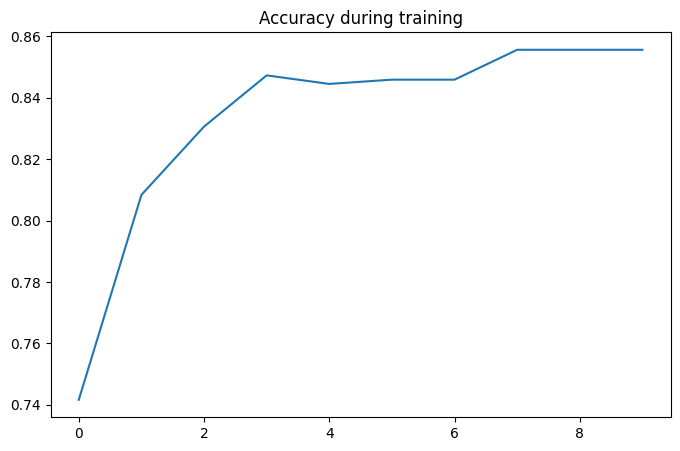

4/4 [==============================] - 0s 4ms/step - loss: 0.4833 - accuracy: 0.8100


[0.4832984209060669, 0.8100000023841858]

In [76]:
#build and eveluate
batchsize=64
epoch= 10
VERBOSE= 1
validation_splt=0.2
history=model.fit(X_train,
                  Y_train,
                  batch_size=batchsize,
                  epochs=epoch,
                  verbose=VERBOSE,
                   validation_split=validation_splt
                   )
import matplotlib.pyplot as plt
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title('Accuracy during training')
plt.show()
#evaluate dataset against test data
model.evaluate(X_test,Y_test)

In [77]:
#save model
model.save('Data_center_save')

INFO:tensorflow:Assets written to: Data_center_save\assets


INFO:tensorflow:Assets written to: Data_center_save\assets


In [78]:
#loading a model
loaded_model=keras.models.load_model('Data_center_save')

#print model summary
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_1 (Dense)      (None, 256)               2048      
                                                                 
 Hidden_layer_2 (Dense)      (None, 256)               65792     
                                                                 
 output-layer (Dense)        (None, 3)                 771       
                                                                 
Total params: 68,611
Trainable params: 68,611
Non-trainable params: 0
_________________________________________________________________


In [79]:
#pass individual flag to predict the trouble
CPU_LOAD=1
MEMORY_LEAK=0
DELAY=1
ERROR_1000=0
ERROR_1001=1
ERROR_1002=1
ERROR_1003=0
PREDICTION=np.argmax(model.predict([[CPU_LOAD, MEMORY_LEAK, DELAY, ERROR_1000,ERROR_1001,ERROR_1002, ERROR_1003]]), axis=1)
print(label_encoder.inverse_transform(PREDICTION))

1/1 [==============================] - 0s 165ms/step
['DATABASE_ISSUE']


In [80]:
print(label_encoder.inverse_transform(np.argmax(model.predict([[1,0,0,0,0,0,1],
                                    [1,1,0,0,0,0,0],
                                    [0,0,1,0,0,0,0],
                                    [0,1,0,1,1,0,0],
                                    [0,0,0,0,1,0,0]
                                     ]), axis=1)))


1/1 [==============================] - 0s 89ms/step
['MEMORY_LEAK' 'MEMORY_LEAK' 'NETWORK_DELAY' 'NETWORK_DELAY'
 'NETWORK_DELAY']
